<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F
from sklearn import datasets
import numpy as np

A fully-connected 2-layer network with Relu non-linearity.

In [ ]:
# class FCNN(nn.Module):
#   def __init__(self, input_dim, hidden_dim, out_dim):
#     super(FCNN, self).__init__()
#     self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
#     self.preactivation_out = nn.Linear(hidden_dim, out_dim)

#   def forward(self, x):
#     """
#     Input:
#           1-d array
#           x is the input of the Neural Net of dimension input_dim
#     Returns:
#           1-d array of dimension out_dim. The score function output.
#     """
#     preactive_1 = self.preactivation_hidden(x)
#     active_1 = F.relu(preactive_1)
#     pre_output = self.preactivation_out(active_1)
#     output = F.relu(pre_output)
#     return output

# # Why is this code wrong? 


In [ ]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
    self.activation_hidden = nn.ReLU()
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
    self.activation_out = nn.Softmax()

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = self.activation_hidden(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = self.activation_out(pre_output)
    return output



We use this neural net on Iris dataset.

In [ ]:
iris = datasets.load_iris()

In [ ]:
my_net = FCNN(4, 10, 3) 

Remember it was necessary to put .float() after your dataset, otherwise an error occured complaining about the dtype double rather than float! It seems a new error!

To be added to this notebook!

1- Add test data and plot test acc and test loss. ***

2- Try with normalized data.

3- Save the results as well as the trained model and do another experiment with the loaded model! *******

4- Do PCA on the data.

5- Try other classifiers than FCNN.

6- Do updates on batches and not the whole dataset at each epoch! ***

In [ ]:
#1- Add test data and plot test acc and test loss! 
#We can use the train-test-split function in SKLearn to make train and test splits of the entire dataset.
import sklearn.model_selection as model_selection
train_test_separated = model_selection.train_test_split(iris.data,iris.target, test_size = .1, random_state = 0)
train_data, test_data,train_label,test_label = train_test_separated

In [ ]:
# #We transform the splitted data arrays to pytorch tensors.
iris_test = torch.from_numpy(test_data)
iris_test_labels = torch.from_numpy(test_label)

In [ ]:
# iris_train_labels

tensor([0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1,
        1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2,
        1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2,
        0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0,
        1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [ ]:
iris_train_entire = np.column_stack((train_data,train_label))
iris_train_in_batch = torch.utils.data.DataLoader(iris_train_entire, batch_size = 5, shuffle= True)

In [ ]:
type(iris_train_labels_batch.long())


torch.Tensor

In [ ]:
num_batches

5.0

In [ ]:
#Now, we train and test the model.
batch_size = 5
num_batches = len(train_data)/batch_size
epochs = range(3000)
learning_rate = 1e-3
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr = learning_rate)
#iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
#iris_train.requires_grad = True
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
  accuracy = 0
  my_loss = 0
  for batch in iris_train_in_batch:
    
    iris_train_batch = batch[:,:-1]
    iris_train_in_batch.requires_grad = True

    iris_train_labels_batch = batch[:,-1].long()
    optimizer.zero_grad()
    output = my_net.forward(iris_train_batch.float())
    predictions = torch.argmax(output, axis = 1)
    iris_loss = loss(output, iris_train_labels_batch)
    iris_loss.backward()
    optimizer.step()
    accuracy += (predictions==iris_train_labels_batch).float().mean()
    my_loss += iris_loss
  train_acc_list.append(accuracy/num_batches)
  train_loss_list.append(iris_loss)

  test_output = my_net.forward(iris_test)
  test_preds = torch.argmax(test_output, axis = 1)
  iris_test_loss = loss(test_output, iris_test_labels)
  test_acc = (test_preds == iris_test_labels).float().mean()
  test_acc_list.append(test_acc)
  test_loss_list.append(iris_test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


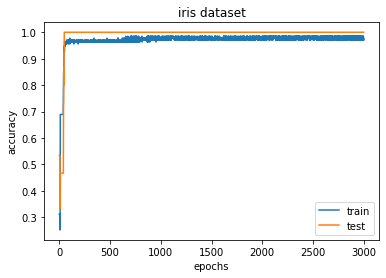

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_acc_list, label = 'train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.plot(epochs, test_acc_list, label = 'test')
plt.legend()

In [ ]:
test_acc

tensor(1.)

In [ ]:
#3- Save the results as well as the trained model and do another experiment with the loaded model!

In [ ]:
results_dic = {'lr': learning_rate, 'train_acc_list' : train_acc_list, 'test_acc_list': test_acc_list, 'train_loss_list': train_loss_list, 'test_loss_list': test_loss_list, 'model_parameters':list(my_net.parameters())}

Therefore, we have recorded the learned model. So, we can load the saved model and test it on the data. So, the question is how to attribute those weights to a network.

In [ ]:
import pickle

In [ ]:
with open('results' , 'wb') as fcnn_write:
  pickle.dump(results_dic, fcnn_write)

In [ ]:
with open('f' , 'rb') as fcnn_read:
  unpickler = pickle.Unpickler(fcnn_read)
  res = unpickler.load()

In [ ]:
res['model_parameters']

[Parameter containing:
 tensor([[ 0.2365, -0.8557,  1.7003,  0.9059],
         [ 1.2218,  0.3289, -1.2295, -1.3874],
         [-0.3804, -0.4954, -0.1255, -0.1048],
         [-0.6304, -1.0083,  1.4099,  1.7276],
         [ 0.0905, -0.2824,  0.7522,  1.4154],
         [ 1.4773,  1.0010, -1.1327, -1.4280],
         [ 0.0430,  0.0320, -0.4927, -0.0668],
         [-0.3413,  0.0530,  0.2631, -0.4460],
         [ 0.3266, -0.4534, -0.3845, -0.1433],
         [ 0.0110, -0.1963, -0.2211, -0.3685]], requires_grad=True),
 Parameter containing:
 tensor([-1.2375,  1.0975, -0.2885, -1.9593, -0.3746,  1.6819,  0.0369, -0.3585,
          0.0889,  0.3582], requires_grad=True),
 Parameter containing:
 tensor([[-1.4606,  1.0519, -0.2035, -0.6825, -0.3087,  0.7172, -0.0167,  0.2867,
           0.1068, -0.3139],
         [ 0.3563,  0.1774,  0.2129, -1.8739, -0.1391,  0.5099, -0.0667, -0.1558,
           0.0298,  0.0134],
         [ 1.1414, -1.1374, -0.1671,  1.7961,  0.3804, -1.0959,  0.3091, -0.1404,
     

In [ ]:
#We save the model.
torch.save(my_net,'saved_model')

In [ ]:
#We load the model to check its output on the test set without more training.
loaded_model = torch.load('saved_model')

In [ ]:
#Apply the trained model on a dataset.

iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
#iris_train.requires_grad = True

output = loaded_model(iris_train)
predictions = torch.argmax(output, axis = 1)
iris_loss = loss(output, iris_train_labels)
accuracy = (predictions==iris_train_labels).float().mean()

test_output = loaded_model.forward(iris_test)
test_preds = torch.argmax(test_output, axis = 1)
iris_test_loss = loss(test_output, iris_test_labels)
test_acc = (test_preds == iris_test_labels).float().mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


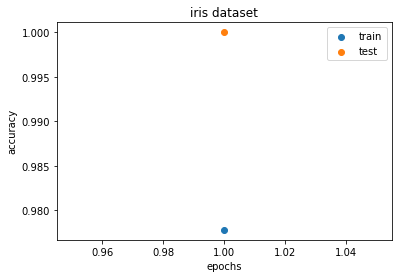

In [ ]:
import matplotlib.pyplot as plt

plt.scatter( [1], accuracy, label = 'train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.scatter([1], test_acc, label = 'test')
plt.legend()

In [ ]:
#6- Do updates on batches and not the whole dataset at each epoch! It's done now!

#PART 2: CNN

In [2]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
torch.cuda.is_available()

True

In [8]:
#5- Other classifiers. Now, CNN! Without Dropout.
#Let's make it for MNIST with 28x28 pictures.
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,5,kernel_size= 5) #output will be 24x24 images in 5 channels.
    self.relu = torch.nn.ReLU()
    self.conv2 = nn.Conv2d(5, 5, kernel_size= 5) #output will be 20x20 images in 5 channels.
    self.maxpool = nn.MaxPool2d(kernel_size= 2) #output will be 10x10 images in 5 channels.
    self.linear_1 = nn.Linear(in_features= 500, out_features = 100)
    self.linear_2 = nn.Linear(in_features= 100, out_features= 10)
    self.softmax = nn.Softmax()
  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.relu(x)
    x = x.view(-1, 500) # It is important. You should'nt use ".flatten", if you want it work correctly with the batch-size.
    x = self.linear_1(x)
    x = self.relu(x)
    x= self.linear_2(x)
    output = self.softmax(x)

    return output

In [9]:
my_cnn = CNN().to(device)

##Applying our model on MNIST.

In [4]:
import torchvision

In [5]:
from torchvision import datasets
from torchvision import transforms
transformtotensor = transforms.ToTensor()
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.13,), (.3,))])

In [6]:
mnist_train = datasets.MNIST(root = 'MNIST/processed/training.pt' , download= True, transform= transformations)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/processed/training.pt/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/processed/training.pt/MNIST/raw




Extracting MNIST/processed/training.pt/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/processed/training.pt/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/processed/training.pt/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/processed/training.pt/MNIST/raw




Extracting MNIST/processed/training.pt/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/processed/training.pt/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
mnist_test = datasets.MNIST(root = 'MNIST/processed/test.pt' , download= True, train =False, transform= transformations)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/processed/test.pt/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/processed/test.pt/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/processed/test.pt/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/processed/test.pt/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/processed/test.pt/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/processed/test.pt/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/processed/test.pt/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/processed/test.pt/MNIST/raw



In [12]:
mnist_loaded = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle = True)

In [13]:
mnist_test_loaded = torch.utils.data.DataLoader(mnist_test, batch_size = 10000, shuffle = False)

In [ ]:
list(mnist_test_loaded)[0][1]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [14]:
#Now we train our CNN on it.
#Now, we train and test the model.
batch_size = 100
num_batches = len(mnist_loaded)
epochs = range(20)
learning_rate = 1e-3
loss = nn.CrossEntropyLoss()#.to(device)
optimizer = torch.optim.Adam(my_cnn.parameters(), lr = learning_rate)
#iris_test = iris_test.float()
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
  accuracy = 0
  my_loss = 0
  for data,label in mnist_loaded:
    
    mnist_train_batch = data.to(device)
    mnist_train_batch.requires_grad = True

    mnist_train_labels_batch = label.to(device)
    optimizer.zero_grad()
    output = my_cnn.forward(mnist_train_batch).float()#.to(device)
    predictions = torch.argmax(output, axis = 1)
    mnist_loss = loss(output, mnist_train_labels_batch)#.to(device)
    mnist_loss.backward()
    optimizer.step()
    accuracy += (predictions == mnist_train_labels_batch).float().mean()
    my_loss += mnist_loss
  train_acc_list.append(accuracy/num_batches)
  train_loss_list.append(mnist_loss)

  accuracy_test = 0
  my_test_loss = 0
  with torch.no_grad():
    mnist_test, mnist_label_test = list(mnist_test_loaded)[0]
    mnist_test = mnist_test.to(device)
    mnist_label_test = mnist_label_test.to(device)
      
    #mnist_train_labels_batch = label
    output_test = my_cnn.forward(mnist_test).float()#.to(device)
    predictions_test = torch.argmax(output_test, axis = 1)
    mnist_test_loss = loss(output_test, mnist_label_test)#.to(device)
    accuracy_test += (predictions_test == mnist_label_test).float().mean()
    my_test_loss += mnist_test_loss
  test_acc_list.append(accuracy_test)
  test_loss_list.append(mnist_test_loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


First we plot the results with normalization!

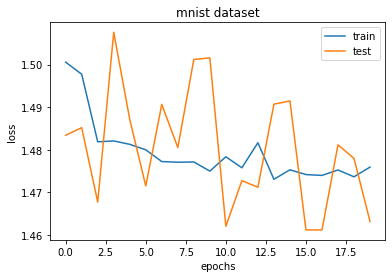

In [16]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_loss_list, label = 'train')
plt.plot(epochs, train_loss_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('mnist dataset')

plt.legend()

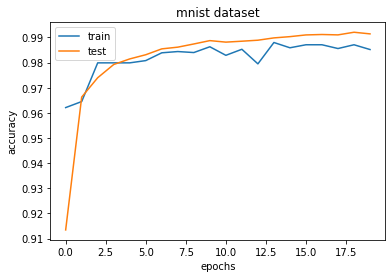

In [17]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_acc_list, label = 'train')
plt.plot(epochs, train_acc_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('mnist dataset')

plt.legend()

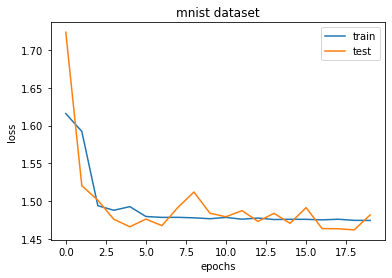

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_loss_list, label = 'train')
plt.plot(epochs, train_loss_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('mnist dataset')

plt.legend()

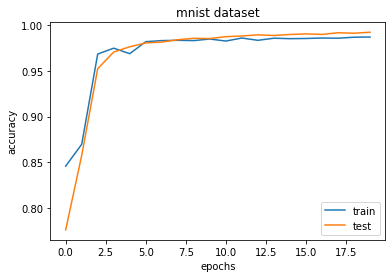

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_acc_list, label = 'train')
plt.plot(epochs, train_acc_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('mnist dataset')

plt.legend()

Next, we plot the old results without normalization.

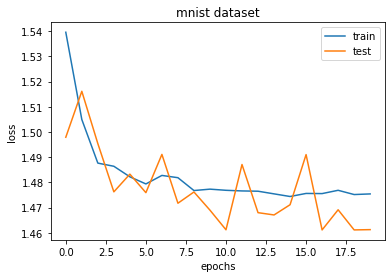

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_loss_list, label = 'train')
plt.plot(epochs, train_loss_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('mnist dataset')

plt.legend()

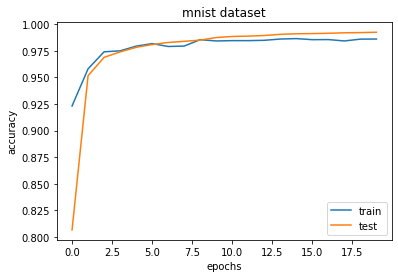

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_acc_list, label = 'train')
plt.plot(epochs, train_acc_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('mnist dataset')

plt.legend()

Next step: 1- Put it on CUDA! 2- Including Dropout in our neural network.

Before that, let's try a smaller lr!

In [ ]:
#Now we train our CNN on it.
#Now, we train and test the model.
batch_size = 100
num_batches = len(mnist_loaded)
epochs = range(20)
learning_rate = 5e-4
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_cnn.parameters(), lr = learning_rate)
#iris_test = iris_test.float()
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
  accuracy = 0
  my_loss = 0
  for data,label in mnist_loaded:
    
    mnist_train_batch = data
    mnist_train_batch.requires_grad = True

    mnist_train_labels_batch = label
    optimizer.zero_grad()
    output = my_cnn.forward(mnist_train_batch).float()
    predictions = torch.argmax(output, axis = 1)
    mnist_loss = loss(output, mnist_train_labels_batch)
    mnist_loss.backward()
    optimizer.step()
    accuracy += (predictions == mnist_train_labels_batch).float().mean()
    my_loss += mnist_loss
  train_acc_list.append(accuracy/num_batches)
  train_loss_list.append(mnist_loss)

  accuracy_test = 0
  my_test_loss = 0
  mnist_test, mnist_label_test = list(mnist_test_loaded)[0]
    
  #mnist_train_labels_batch = label
  output_test = my_cnn.forward(mnist_test).float()
  predictions_test = torch.argmax(output_test, axis = 1)
  mnist_test_loss = loss(output_test, mnist_label_test)
  accuracy_test += (predictions_test == mnist_label_test).float().mean()
  my_test_loss += mnist_test_loss
  test_acc_list.append(accuracy_test)
  test_loss_list.append(mnist_test_loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


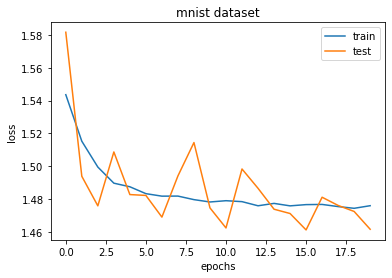

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_loss_list, label = 'train')
plt.plot(epochs, train_loss_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('mnist dataset')

plt.legend()

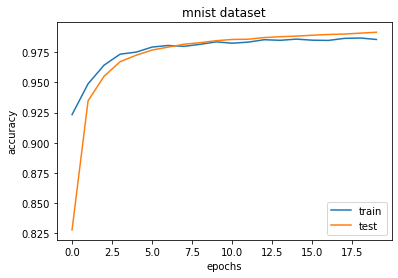

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_acc_list, label = 'train')
plt.plot(epochs, train_acc_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('mnist dataset')

plt.legend()

# CIFAR10.

In [6]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
transformtotensor = transforms.ToTensor()
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.13,), (.3,))])


In [6]:
cifar10 = datasets.CIFAR10(root =  'Cifar.train'  , train = True, transform= transformations, download= True)


Extracting Cifar.train/cifar-10-python.tar.gz to Cifar.train


In [7]:
CIFAR_loaded = torch.utils.data.DataLoader(cifar10, batch_size = 100, shuffle = True)

In [8]:
cifar10_test = datasets.CIFAR10(root =  'Cifar.test'  , train = False, transform= transformations, download= True)


Extracting Cifar.test/cifar-10-python.tar.gz to Cifar.test


In [9]:
CIFAR_test_loaded = torch.utils.data.DataLoader(cifar10_test, batch_size = 100, shuffle = True)

In [10]:
len(list(CIFAR_loaded))

500

In [24]:
first_image = list(CIFAR)[0][0]

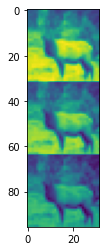

In [47]:
plt.imshow(first_image[1].view(96,32))#, cmap = 'gray')

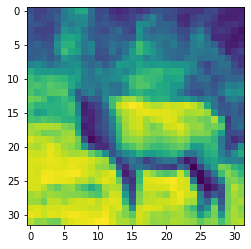

In [62]:
plt.imshow(first_image[1].mean(0))

In [11]:
#5- Other classifiers. Now, CNN! Without Dropout.
#Let's make it for MNIST with 28x28 pictures.
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(3,5,kernel_size= 5) #output will be 28x28 images in 5 channels.
    self.relu = torch.nn.ReLU()
    self.conv2 = nn.Conv2d(5, 5, kernel_size= 5) #output will be 24x24 images in 5 channels.
    self.maxpool = nn.MaxPool2d(kernel_size= 2) #output will be 12x12 images in 5 channels.
    self.linear_1 = nn.Linear(in_features= 720, out_features = 100)
    self.linear_2 = nn.Linear(in_features= 100, out_features= 10)
    self.softmax = nn.Softmax()
  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.relu(x)
    x = x.view(-1, 720) # It is important. You should'nt use ".flatten", if you want it work correctly with the batch-size.
    x = self.linear_1(x)
    x = self.relu(x)
    x= self.linear_2(x)
    output = self.softmax(x)

    return output

In [12]:
my_cnn = CNN().to(device)

In [13]:
#Now, we train our CNN on it.
#Now, we train and test the model.
batch_size = 100
num_batches = len(CIFAR_loaded)
epochs = range(100)
learning_rate = 1e-3
loss = nn.CrossEntropyLoss()#.to(device)
optimizer = torch.optim.Adam(my_cnn.parameters(), lr = learning_rate)
#iris_test = iris_test.float()
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
  accuracy = 0
  my_loss = 0
  for data,label in CIFAR_loaded:
    
    cifar_train_batch = data.to(device)
    cifar_train_batch.requires_grad = True

    cifar_train_labels_batch = label.to(device)
    optimizer.zero_grad()
    output = my_cnn.forward(cifar_train_batch).float()#.to(device)
    predictions = torch.argmax(output, axis = 1)
    cifar_loss = loss(output, cifar_train_labels_batch)#.to(device)
    cifar_loss.backward()
    optimizer.step()
    accuracy += (predictions == cifar_train_labels_batch).float().mean()
    my_loss += cifar_loss
  train_acc_list.append(accuracy/num_batches)
  train_loss_list.append(cifar_loss)

  accuracy_test = 0
  my_test_loss = 0
  with torch.no_grad():
    cifar_test, cifar_label_test = list(CIFAR_test_loaded)[0]
    cifar_test = cifar_test.to(device)
    cifar_label_test = cifar_label_test.to(device)
      
    output_test = my_cnn.forward(cifar_test).float()#.to(device)
    predictions_test = torch.argmax(output_test, axis = 1)
    cifar_test_loss = loss(output_test, cifar_label_test)#.to(device)
    accuracy_test += (predictions_test == cifar_label_test).float().mean()
    my_test_loss += cifar_test_loss
  test_acc_list.append(accuracy_test)
  test_loss_list.append(cifar_test_loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


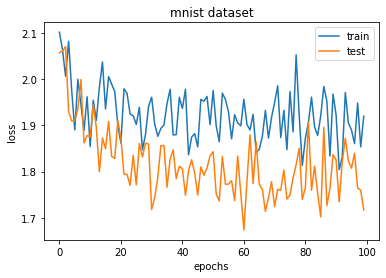

In [14]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_loss_list, label = 'train')
plt.plot(epochs, train_loss_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('mnist dataset')

plt.legend()

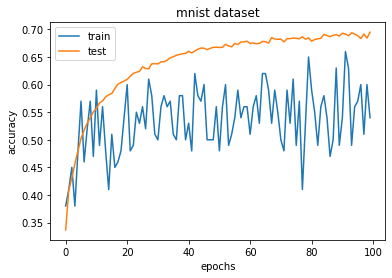

In [15]:
import matplotlib.pyplot as plt
plt.plot(epochs, test_acc_list, label = 'train')
plt.plot(epochs, train_acc_list, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('mnist dataset')

plt.legend()